In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#wrangling
import pandas as pd
import numpy as np

#explore
import scipy.stats as stats

#visuals
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


#default pandas decimal display formatting
pd.options.display.float_format='{:20,.2f}'.format

import env
import acquire
import prepare
# import summarize

### Acquire & Summarize

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

    - Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
    - Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
    - Only include properties that include a latitude and longitude value.

Acquired zillow data using acquire.py (sequel query in this file)

In [3]:
df = acquire.get_zillow_data()

In [4]:
# df.transactiondate = pd.to_datetime(df.transactiondate, format='%Y-%m-%d')
# df = df.sort_values("transactiondate").drop_duplicates('parcelid',keep='last') 

In [5]:
df.head()

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc,airconditioningdesc,buildingclassdesc,heatingorsystemdesc
0,nan,3.50,4.00,3.50,nan,"3,100.00","3,100.00",nan,nan,nan,...,nan,"60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential,None,None,None,None,None
1,nan,1.00,2.00,1.00,"1,465.00","1,465.00","1,465.00",nan,nan,"1,465.00",...,nan,"61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential,None,None,None,None,None
2,nan,2.00,3.00,2.00,nan,"1,243.00","1,243.00",nan,nan,nan,...,nan,"60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential,None,None,None,None,None
3,nan,3.00,4.00,3.00,nan,"2,376.00","2,376.00",nan,nan,nan,...,nan,"60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential,None,None,None,None,Central
4,nan,3.00,3.00,3.00,nan,"1,312.00","1,312.00",nan,nan,nan,...,nan,"60,371,236,012,000.00",0.01,2017-01-01,Condominium,None,None,Central,None,Central


2. Summary of zillow data (summary stats, info, dtypes, shape, distributions)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 52 columns):
basementsqft                    50 non-null float64
bathroomcnt                     77381 non-null float64
bedroomcnt                      77381 non-null float64
calculatedbathnbr               76772 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet    77185 non-null float64
finishedsquarefeet12            73749 non-null float64
finishedsquarefeet13            41 non-null float64
finishedsquarefeet15            3009 non-null float64
finishedsquarefeet50            6023 non-null float64
finishedsquarefeet6             386 non-null float64
fips                            77381 non-null float64
fireplacecnt                    8276 non-null float64
fullbathcnt                     76772 non-null float64
garagecarcnt                    25474 non-null float64
garagetotalsqft                 25474 non-null float64
hashottuborspa         

In [10]:
df.describe()

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,50.00,"77,381.00","77,381.00","76,772.00","6,023.00","77,185.00","73,749.00",41.00,"3,009.00","6,023.00",...,"17,560.00",172.00,"77,269.00","77,380.00","77,381.00","77,379.00","77,376.00","2,886.00","77,137.00","77,381.00"
mean,679.72,2.30,3.05,2.32,"1,366.51","1,785.22","1,760.52","1,389.85","2,357.79","1,381.77",...,1.43,1.00,"189,314.53","490,134.48","2,016.00","301,095.41","5,995.53",14.09,"60,496,733,646,264.16",0.02
std,689.70,1.00,1.14,0.98,671.31,954.05,934.02,123.53,"1,188.78",726.47,...,0.54,0.00,"230,087.42","653,443.97",0.00,"492,596.03","7,622.84",2.19,"1,535,241,981,138.57",0.17
min,38.00,0.00,0.00,1.00,44.00,128.00,128.00,"1,056.00",598.00,44.00,...,1.00,1.00,44.00,"1,000.00","2,016.00",161.00,19.92,3.00,"60,371,011,101,000.00",-4.66
25%,273.00,2.00,2.00,2.00,955.00,"1,182.00","1,172.00","1,344.00","1,625.00",956.00,...,1.00,1.00,"84,265.00","207,000.00","2,016.00","85,504.00","2,715.63",14.00,"60,373,109,005,002.00",-0.02
50%,515.00,2.00,3.00,2.00,"1,257.00","1,543.00","1,523.00","1,440.00","2,094.00","1,259.00",...,1.00,1.00,"136,499.00","358,975.50","2,016.00","203,372.00","4,450.69",15.00,"60,376,032,003,008.00",0.01
75%,796.50,3.00,4.00,3.00,"1,615.00","2,113.00","2,076.00","1,440.00","2,838.00","1,621.50",...,2.00,1.00,"218,787.00","569,001.50","2,016.00","366,796.50","6,927.79",15.00,"60,590,423,251,008.00",0.04
max,"3,560.00",18.00,16.00,18.00,"6,912.00","35,640.00","21,929.00","1,560.00","35,640.00","12,467.00",...,6.00,1.00,"11,421,790.00","49,061,236.00","2,016.00","48,952,198.00","586,639.30",99.00,"483,030,105,084,015.00",5.26


In [11]:
df.dtypes

basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                  float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
poolsizesum                     float64
propertycountylandusecode        object
propertyzoningdesc               object
regionidcity                    float64


In [12]:
pd.DataFrame(df.columns)

,0
0,basementsqft
1,bathroomcnt
2,bedroomcnt
3,calculatedbathnbr
4,finishedfloor1squarefeet
5,calculatedfinishedsquarefeet
6,finishedsquarefeet12
7,finishedsquarefeet13
8,finishedsquarefeet15
9,finishedsquarefeet50


In [13]:
df.shape

(77381, 52)

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

- Number of rows with missing values

In [6]:
number_missing = df.isnull().sum()

- percent of total rows that have missing values

In [7]:
pct_missing = (df.isnull().sum())/df.shape[0]

In [8]:
nulls_by_column_df = pd.DataFrame({'num_rows_missing': number_missing, 'pct_rows_missing': pct_missing})

In [9]:
def nulls_by_col(df):
    number_missing = df.isnull().sum()
    pct_missing = (df.isnull().sum())/df.shape[0]
    rows_missing_df = pd.DataFrame({'num_rows_missing': number_missing, 'pct_rows_missing': pct_missing})
    return nulls_by_column_df

In [10]:
nulls_by_column_df

,num_rows_missing,pct_rows_missing
basementsqft,77331,1.00
bathroomcnt,0,0.00
bedroomcnt,0,0.00
calculatedbathnbr,609,0.01
finishedfloor1squarefeet,71358,0.92
calculatedfinishedsquarefeet,196,0.00
finishedsquarefeet12,3632,0.05
finishedsquarefeet13,77340,1.00
finishedsquarefeet15,74372,0.96
finishedsquarefeet50,71358,0.92


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [11]:
df.fips.unique()

array([6059., 6111., 6037.])

In [12]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [13]:
num_cols_missing = df.isnull().sum(axis=1)
pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()

In [14]:
rows_missing

,num_cols_missing,pct_cols_missing,num_rows
0,15,28.846153846153843,6
1,16,30.76923076923077,46
2,17,32.69230769230769,244
3,18,34.61538461538461,482
4,19,36.53846153846153,1074
5,20,38.46153846153847,2661
6,21,40.38461538461539,8762
7,22,42.30769230769231,14752
8,23,44.230769230769226,24003
9,24,46.15384615384615,17749


### Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

#### Single Unit Properties (as defined by Jeff Hutchins)

Single Family Residential = 52320

Residential General = 37

Rural Residence = 0

Mobile Home = 74

Manufactured, Modular, Prefabricated Homes = 58

Inferred Single Family Residential = 0

Bungalow = 0

In [15]:
(df.propertylandusedesc == 'Single Family Residential').sum()

52320

In [16]:
df.fips.unique()

array([6059., 6111., 6037.])

In [17]:
df.shape

(77381, 52)

Get rid of most columns with nans, accept for columns like has pool.  can safely assume a nan means they dont have a pool and should be zero, not nan.

So get rid of most columns with nans in order to make an initial baseline model.

For Mall data, can bin into big spenders, middle, low, etc.  Might be a good plan

# Going to compare create a new column called price_per_sq_ft and compare it to latitude and longitude points using a clustering method called K-means clustering.

In [18]:
df.head()

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc,airconditioningdesc,buildingclassdesc,heatingorsystemdesc
0,nan,3.50,4.00,3.50,nan,"3,100.00","3,100.00",nan,nan,nan,...,nan,"60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential,None,None,None,None,None
1,nan,1.00,2.00,1.00,"1,465.00","1,465.00","1,465.00",nan,nan,"1,465.00",...,nan,"61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential,None,None,None,None,None
2,nan,2.00,3.00,2.00,nan,"1,243.00","1,243.00",nan,nan,nan,...,nan,"60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential,None,None,None,None,None
3,nan,3.00,4.00,3.00,nan,"2,376.00","2,376.00",nan,nan,nan,...,nan,"60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential,None,None,None,None,Central
4,nan,3.00,3.00,3.00,nan,"1,312.00","1,312.00",nan,nan,nan,...,nan,"60,371,236,012,000.00",0.01,2017-01-01,Condominium,None,None,Central,None,Central


In [19]:
df_subset = df[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'latitude', 'longitude']]
df_subset.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,latitude,longitude
0,"3,100.00","1,023,282.00","33,634,931.00","-117,869,207.00"
1,"1,465.00","464,000.00","34,449,266.00","-119,281,531.00"
2,"1,243.00","564,778.00","33,886,168.00","-117,823,170.00"
3,"2,376.00","145,143.00","34,245,180.00","-118,240,722.00"
4,"1,312.00","119,407.00","34,185,120.00","-118,414,640.00"


In [20]:
df_subset['price_per_sq_ft'] = df_subset.taxvaluedollarcnt/df_subset.calculatedfinishedsquarefeet

In [21]:
df_subset.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,latitude,longitude,price_per_sq_ft
0,"3,100.00","1,023,282.00","33,634,931.00","-117,869,207.00",330.09
1,"1,465.00","464,000.00","34,449,266.00","-119,281,531.00",316.72
2,"1,243.00","564,778.00","33,886,168.00","-117,823,170.00",454.37
3,"2,376.00","145,143.00","34,245,180.00","-118,240,722.00",61.09
4,"1,312.00","119,407.00","34,185,120.00","-118,414,640.00",91.01


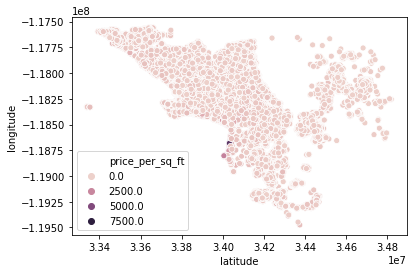

In [50]:
sns.scatterplot(x='latitude',y='longitude',hue='price_per_sq_ft',data=df_subset, x_jitter=True, y_jitter=True)
plt.legend()

In [22]:
df_subset = df_subset.dropna()

In [23]:
df_subset.isnull().sum()

calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
latitude                        0
longitude                       0
price_per_sq_ft                 0
dtype: int64

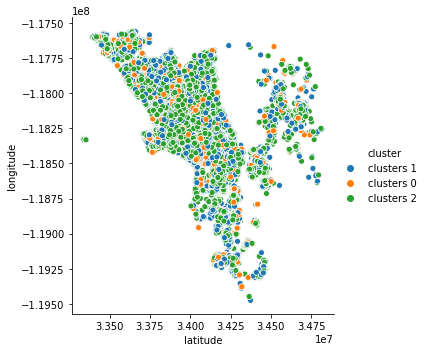

In [68]:
from sklearn.cluster import KMeans

X = df_subset[['price_per_sq_ft', 'latitude', 'longitude']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

X['cluster'] = 'clusters ' + pd.Series(kmeans.predict(X)).astype(str)

sns.relplot(data=X, hue='cluster', x='latitude', y='longitude')

In [80]:
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[1 0 1 ... 2 1 1]
4922301250808020.0
6
[[ 2.48530166e+02  3.42559641e+07 -1.18825117e+08]
 [ 2.61402179e+02  3.37881016e+07 -1.17874466e+08]
 [ 2.76027126e+02  3.41224943e+07 -1.18296331e+08]]


In [30]:
df_subset.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,latitude,longitude,price_per_sq_ft
0,"3,100.00","1,023,282.00","33,634,931.00","-117,869,207.00",330.09
1,"1,465.00","464,000.00","34,449,266.00","-119,281,531.00",316.72
2,"1,243.00","564,778.00","33,886,168.00","-117,823,170.00",454.37
3,"2,376.00","145,143.00","34,245,180.00","-118,240,722.00",61.09
4,"1,312.00","119,407.00","34,185,120.00","-118,414,640.00",91.01


In [35]:
from sklearn.cluster import KMeans

X = df_subset[['price_per_sq_ft']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
print(kmeans.labels_)

print(kmeans.cluster_centers_)

[1 1 1 ... 0 1 0]
[[ 157.04685516]
 [ 390.67337335]
 [1147.36876886]]


In [37]:
X['cluster'] = 'clusters ' + pd.Series(kmeans.predict(X)).astype(str)

In [38]:
X['latitude'] = df_subset['latitude']

In [39]:
X['longitude'] = df_subset['longitude']

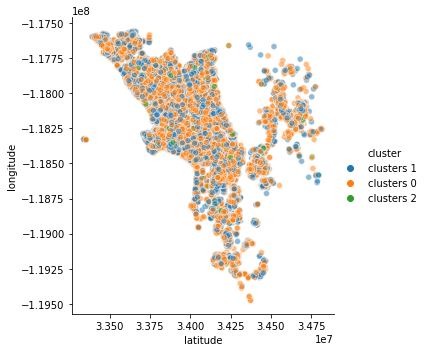

In [41]:
sns.relplot(data=X, hue='cluster', x='latitude', y='longitude', alpha=.5)